<a href="https://colab.research.google.com/github/wer-SyS/Nikita_999/blob/main/laboratory12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле.

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

# **ЗАГРУЗКА НЕОБХОДИМЫХ ДАННЫХ И ПОВЕРХНОСТНОЕ ИЗУЧЕНИЕ ОБЩЕЙ ИНФОРМАЦИИ**

In [ ]:
import pandas as pd

# Установка максимальной ширины столбца для отображения всех данных
pd.set_option('max_colwidth', 1000)

# Установка ширины отображаемой области (в символах)
pd.set_option('display.width', 150)

data = pd.read_excel('data.xlsx')

print(data.head(10))

   Номер заказа         Канал продаж     Продуктовый сегмент   Менеджер         Название заказа   Продавец            Город  Продажи факт, тыс.руб  \
0          7290         Рекомендация      Ткань и аксессуары   С. Милер                NAM SUNG   Айсберг   Санкт-Петербург                    300   
1          7291         Рекомендация      Ткань и аксессуары   С. Милер                CP Ткань   Айсберг   Санкт-Петербург                    450   
2          7436         Рекомендация      Ткань и аксессуары   С. Милер          UNIZIN COMPANY   Айсберг   Санкт-Петербург                      0   
3          7484         Рекомендация      Ткань и аксессуары   С. Милер                NAM SUNG   Айсберг   Санкт-Петербург                    500   
4          7040      Холодный звонок  Электронные устройства   М. Баили  Электронные устройства   Alen.com     Магнитогорск                    100   
5          7166  Контекстная реклама  Электронные устройства      Т. Ли                     USB    A

In [ ]:
# Взглянем на названия столбцов
print(data.columns.tolist(), '\n')

# Взглянем на тип данных столбцов
print(data.dtypes, '\n')

# Взглянем на все уникальные значения столбцов
for column in data.columns:
    print(f"\n{column}:\n{', '.join(map(str, data[column].unique()))}")

['Номер заказа', 'Канал продаж', 'Продуктовый сегмент', 'Менеджер', 'Название заказа', 'Продавец', 'Город', 'Продажи факт, тыс.руб', 'Продажи план, тыс.руб', 'Дата сделки', 'Дата оплаты', 'Дней между сделкой и оплатой', 'Статус'] 

Номер заказа                             int64
Канал продаж                            object
Продуктовый сегмент                     object
Менеджер                                object
Название заказа                         object
Продавец                                object
Город                                   object
Продажи факт, тыс.руб                    int64
Продажи план, тыс.руб                    int64
Дата сделки                     datetime64[ns]
Дата оплаты                     datetime64[ns]
Дней между сделкой и оплатой            object
Статус                                  object
dtype: object 


Номер заказа:
7290, 7291, 7436, 7484, 7040, 7166, 7185, 7047, 6645, 7210, 7283, 7307, 7398, 7374, 7375, 7300, 7101, 7244, 7348, 7288, 7405, 

In [ ]:
# Обратим внимание, что:
#1. В значениях есть лишние пробелы
#2. Есть значения, состоящие из одних пробелов.
#3. В столбце "Дней между сделкой и оплатой" тип данных "object"
#4. Есть такие значения, как NaT и NaN, где первый расшифровывается как "Not a Time", а второй как "Not a Number"

# Взглянем на количество пустых строк
print(data.isnull().sum(), '\n')

# Взглянем на значения, которые состоят из одних пробелов
empty_string_counts = {}
for column in data.columns:
    # Подсчёт значений, содержащих только пробелы
    count_empty_strings = data[column].apply(lambda x: isinstance(x, str) and x.strip() == "").sum()
    empty_string_counts[column] = count_empty_strings
    print(f"{column}: {count_empty_strings}")

Номер заказа                     0
Канал продаж                     0
Продуктовый сегмент              0
Менеджер                         0
Название заказа                  0
Продавец                         0
Город                            0
Продажи факт, тыс.руб            0
Продажи план, тыс.руб            0
Дата сделки                      0
Дата оплаты                     23
Дней между сделкой и оплатой     0
Статус                           0
dtype: int64 

Номер заказа: 0
Канал продаж: 0
Продуктовый сегмент: 0
Менеджер: 0
Название заказа: 0
Продавец: 0
Город: 0
Продажи факт, тыс.руб: 0
Продажи план, тыс.руб: 0
Дата сделки: 0
Дата оплаты: 0
Дней между сделкой и оплатой: 23
Статус: 0


# **ПРЕДОБРАБОТКА ДАННЫХ**

In [ ]:
# Удаление лишних пробелов (спереди и сзади) у всех значений
for column in data.columns:
    data[column] = data[column].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Замена значений, состоящих из одних пробелов, на NaN
data = data.replace(r'^\s*$', pd.NA, regex=True)

# Заменяем все пустые значения и значения с типом данных NaN на pd.NA
data = data.apply(lambda col: col.where(~col.isna(), pd.NA))

# Преобразуем столбец в тип int64, заменяя NaN на 0 (чтобы избежать ошибки)
data['Дней между сделкой и оплатой'] = data['Дней между сделкой и оплатой'].fillna(0).astype('int64')

# Возвращаем 0 обратно в NaN
data['Дней между сделкой и оплатой'] = data['Дней между сделкой и оплатой'].replace(0, pd.NA)

# Удаление дубликотов
data = data.drop_duplicates()

<ipython-input-4-9729486b006e>:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Дней между сделкой и оплатой'] = data['Дней между сделкой и оплатой'].fillna(0).astype('int64')


In [ ]:
# Посмотрим на данные после предобработки

print(data.head(10))

for column in data.columns:
    print(f"\n{column}:\n{', '.join(map(str, data[column].unique()))}")

   Номер заказа         Канал продаж     Продуктовый сегмент   Менеджер         Название заказа   Продавец            Город  Продажи факт, тыс.руб  \
0          7290         Рекомендация      Ткань и аксессуары   С. Милер                NAM SUNG    Айсберг  Санкт-Петербург                    300   
1          7291         Рекомендация      Ткань и аксессуары   С. Милер                CP Ткань    Айсберг  Санкт-Петербург                    450   
2          7436         Рекомендация      Ткань и аксессуары   С. Милер          UNIZIN COMPANY    Айсберг  Санкт-Петербург                      0   
3          7484         Рекомендация      Ткань и аксессуары   С. Милер                NAM SUNG    Айсберг  Санкт-Петербург                    500   
4          7040      Холодный звонок  Электронные устройства   М. Баили  Электронные устройства   Alen.com     Магнитогорск                    100   
5          7166  Контекстная реклама  Электронные устройства      Т. Ли                     USB    A

# **АНАЛИЗ ДАННЫХ**

In [ ]:
# взглянем на всех менеджеров и все города, а также на уникальные каналы продаж и продуктовые сегменты у каждого менеджера

print("Уникальные менеджеры:", data['Менеджер'].unique())

print("Уникальные города:", data['Город'].unique())

print("\nМенеджеры по городам:")
print(data.groupby('Менеджер')['Город'].unique())

print("\nМенеджеры по каналам продаж:")
print(data.groupby('Менеджер')['Канал продаж'].unique())

print("\nМенеджеры по продуктовым сегментам:")
print(data.groupby('Менеджер')['Продуктовый сегмент'].unique())

Уникальные менеджеры: ['С. Милер' 'М. Баили' 'Т. Ли' 'А. Фостер' 'Р. Хайерс' 'А. Перри']
Уникальные города: ['Санкт-Петербург' 'Магнитогорск' 'Оренбург' 'Тула' 'Москва' 'Омск'
 'Саратов' 'Пермь' 'Ярославль' 'Сочи' 'Улан-Удэ' 'Липецк' 'Стоврополь'
 'Севастополь' 'Самара' 'Новосибирск' 'Курск' 'Кемерово' 'Нижний Новгород'
 'Казань' 'Челябинск' 'Уфа' 'Волгоград']

Менеджеры по городам:
Менеджер
А. Перри                                                                                                                                                                                  [Тула]
А. Фостер                                                                                                                                                                       [Оренбург, Сочи]
М. Баили     [Магнитогорск, Тула, Москва, Санкт-Петербург, Саратов, Пермь, Ярославль, Улан-Удэ, Липецк, Стоврополь, Севастополь, Самара, Новосибирск, Курск, Кемерово, Оренбург, Уфа, Волгоград]
Р. Хайерс                 



---


## **КАКИЕ КАНАЛЫ ПРОДАЖ ПРИНОСЯТ НАИБОЛЬШУЮ ПРИБЫЛЬ? КАКИЕ КАНАЛЫ ПРОДАЖ СПОСОБСТВУЮТ ВЫПОЛНЕНИЮ ПЛАНОВ ПО ПРОДАЖАМ? ДАННЫЕ БЕЗ РАЗБИВКИ (ГРУППИРОВКА)**

In [ ]:
# Посчитаем суммарные плановые и фактические продажи по каналам продаж
sale_channels = data.groupby('Канал продаж')[['Продажи план, тыс.руб', 'Продажи факт, тыс.руб']].sum().reset_index()

print(sale_channels.sort_values(by='Продажи факт, тыс.руб', ascending=False), '\n')

# Посчитаем процент выполнения плана по каналам продаж (добавив столбец соотношения плана к фактическим продажам)
sale_channels['Процент выполнения плана'] = (sale_channels['Продажи факт, тыс.руб'] / sale_channels['Продажи план, тыс.руб'] * 100).round(1)

print(sale_channels.sort_values(by='Процент выполнения плана', ascending=False))

          Канал продаж  Продажи план, тыс.руб  Продажи факт, тыс.руб
1             Выставка                  35500                  28644
4         Рекомендация                  17000                  18035
5      Холодный звонок                  19500                  15732
2  Контекстная реклама                   7000                   2450
3                Почта                   3500                   1550
0              Вебсайт                   2000                    800 

          Канал продаж  Продажи план, тыс.руб  Продажи факт, тыс.руб  Процент выполнения плана
4         Рекомендация                  17000                  18035                     106.1
1             Выставка                  35500                  28644                      80.7
5      Холодный звонок                  19500                  15732                      80.7
3                Почта                   3500                   1550                      44.3
0              Вебсайт                  

## **КАКИЕ ПРОДУКТОВЫЕ СЕГМЕНТЫ ПРИНОСЯТ НАИБОЛЬШУЮ ПРИБЫЛЬ? ПО КАКИМ  ПРОДУКТОВЫМ СЕГМЕНТАМ УДАЁТСЯ ВЫПОЛНЯТЬ ПЛАНЫ ПО ПРОДАЖАМ? ДАННЫЕ БЕЗ РАЗБИВКИ (ГРУППИРОВКА)**

In [ ]:
# Посчитаем суммарные плановые и фактические продажи по продуктовым сегментам
product_sales = data.groupby('Продуктовый сегмент')[['Продажи план, тыс.руб', 'Продажи факт, тыс.руб']].sum().reset_index()

print(product_sales.sort_values(by='Продажи факт, тыс.руб', ascending=False), '\n')

# Посчитаем процент выполнения плана по продуктовым сегментам (добавив столбец соотношения плана к фактическим продажам)
product_sales['Процент выполнения плана'] = (product_sales['Продажи факт, тыс.руб'] / product_sales['Продажи план, тыс.руб'] * 100).round(1)

print(product_sales.sort_values(by='Процент выполнения плана', ascending=False))

       Продуктовый сегмент  Продажи план, тыс.руб  Продажи факт, тыс.руб
6             Оборудование                  46000                  35099
2                   Другое                   5000                   7225
9                     Свет                   6000                   6950
12      Ткань и аксессуары                  10500                   5712
7                   Одежда                   3000                   4650
14  Электронные устройства                   7000                   2130
1                  Бассейн                    500                   1500
11                Сувениры                   1000                    970
10            Спорт товары                   1000                    750
0             Автозапчасти                    500                    700
13                Упаковка                   1500                    675
5                 Медецина                    500                    400
3                  Игрушки                   1000  

## **КАКИЕ ГОРОДА ПРИНОСЯТ НАИБОЛЬШУЮ ПРИБЫЛЬ? В КАКИХ ГОРОДАХ УДАЁТСЯ ВЫПОЛНЯТЬ ПЛАНЫ ПО ПРОДАЖАМ? ДАННЫЕ БЕЗ РАЗБИВКИ (ГРУППИРОВКА)**

In [ ]:
# Посчитаем суммарные плановые и фактические продажи по городам
city_sales = data.groupby('Город')[['Продажи план, тыс.руб', 'Продажи факт, тыс.руб']].sum().reset_index()

print(city_sales.sort_values(by='Продажи факт, тыс.руб', ascending=False), '\n')

# Посчитаем процент выполнения плана по городам (добавив столбец соотношения плана к фактическим продажам)
city_sales['Процент выполнения плана'] = (city_sales['Продажи факт, тыс.руб'] / city_sales['Продажи план, тыс.руб'] * 100).round(1)

print(city_sales.sort_values(by='Процент выполнения плана', ascending=False))

              Город  Продажи план, тыс.руб  Продажи факт, тыс.руб
21        Челябинск                   6000                   8700
1            Казань                   7000                   8040
5      Магнитогорск                  17000                   7680
16             Сочи                   5500                   6950
8       Новосибирск                   6500                   5725
12           Самара                   7500                   5574
20              Уфа                   1500                   4350
0         Волгоград                   2000                   4250
6            Москва                   8000                   3717
10         Оренбург                   7500                   2750
18             Тула                   1500                   1850
7   Нижний Новгород                   3000                   1635
2          Кемерово                    500                   1500
13  Санкт-Петербург                   4000                   1370
19        

## **КАКИЕ КАНАЛЫ ПРОДАЖ ЭФФЕКТИВНЫ В РАЗЛИЧНЫХ ГОРОДАХ? СРАВНИВАЕМ ПО ВЫПОЛНЕНИЮ ПЛАНА ПО ПРОДАЖАМ (СВОДНЫЕ ТАБЛИЦЫ)**

In [ ]:
# Подготовка данных для подсчета завершённых сделок и всех сделок
data['Завершённые сделки'] = data['Статус'].apply(lambda x: 1 if x == 'Закрыто' else 0)
data['Общие сделки'] = data['Статус'].apply(lambda x: 1 if x in ['Закрыто', 'Потерянно'] else 0)

# Группируем данные по Городу и Каналу продаж, суммируя продажи и подсчитывая количество закрытых и общих сделок
grouped_data = data.groupby(['Город', 'Канал продаж']).agg({
    'Продажи факт, тыс.руб': 'sum',
    'Продажи план, тыс.руб': 'sum',
    'Завершённые сделки': 'sum',
    'Общие сделки': 'sum'
}).reset_index()

# Посчитаем процент выполнения плана
grouped_data['Процент выполнения плана'] = (grouped_data['Продажи факт, тыс.руб'] / grouped_data['Продажи план, тыс.руб'] * 100).round(2)

# Создаем сводную таблицу с процентами выполнения плана
pivot_table1 = grouped_data.pivot_table(
    values=['Процент выполнения плана'],
    index='Город',
    columns='Канал продаж',
    aggfunc='mean'
)
pivot_table1 = pivot_table1.sort_values(by=('Процент выполнения плана', pivot_table1.columns.levels[1][0]), ascending=False)

# Значение NaN означает, что необходимые для подсчёта данные отсутствуют
print(pivot_table1)

                Процент выполнения плана                                                                 
Канал продаж                     Вебсайт Выставка Контекстная реклама  Почта Рекомендация Холодный звонок
Город                                                                                                    
Новосибирск                         80.0      NaN               70.00    NaN        75.00           98.57
Санкт-Петербург                      0.0      NaN                 NaN   12.0        62.50             NaN
Волгоград                            NaN      NaN                 NaN    NaN       212.50             NaN
Казань                               NaN   114.86                 NaN    NaN          NaN             NaN
Кемерово                             NaN      NaN                 NaN    NaN       300.00             NaN
Курск                                NaN      NaN                 NaN    NaN       140.00             NaN
Липецк                               NaN      

## **КАКИЕ ПРОДУКТОВЫЕ СЕГМЕНТЫ ПОЛЬЗУЮТСЯ СПРОСОМ В РАЗЛИЧНЫХ ГОРОДАХ? СРАВНИВАЕМ ПО ВЫПОЛНЕНИЮ ПЛАНА ПО ПРОДАЖАМ (СВОДНЫЕ ТАБЛИЦЫ)**


In [ ]:
# Группируем данные по Городу и Продуктовому сегменту, суммируя продажи и подсчитывая количество закрытых и общих сделок
grouped_data = data.groupby(['Город', 'Продуктовый сегмент']).agg({
    'Продажи факт, тыс.руб': 'sum',
    'Продажи план, тыс.руб': 'sum',
    'Завершённые сделки': 'sum',
    'Общие сделки': 'sum'
}).reset_index()

# Посчитаем процент выполнения плана
grouped_data['Процент выполнения плана'] = (grouped_data['Продажи факт, тыс.руб'] / grouped_data['Продажи план, тыс.руб'] * 100).round(2)

# Создаем сводную таблицу с процентами выполнения плана
pivot_table2 = grouped_data.pivot_table(
    values=['Процент выполнения плана'],
    index='Город',
    columns='Продуктовый сегмент',
    aggfunc='mean'
)
pivot_table2 = pivot_table2.sort_values(by=('Процент выполнения плана', pivot_table2.columns.levels[1][0]), ascending=False)

# Значение NaN означает, что необходимые для подсчёта данные отсутствуют
print(pivot_table2)

                    Процент выполнения плана                                                                                                      \
Продуктовый сегмент             Автозапчасти Бассейн  Другое Игрушки Косметика Медецина Оборудование Одежда Охота и рыбалка    Свет Спорт товары   
Город                                                                                                                                              
Курск                                  140.0     NaN     NaN     NaN       NaN      NaN          NaN    NaN             NaN     NaN          NaN   
Волгоград                                NaN     NaN  212.50     NaN       NaN      NaN          NaN    NaN             NaN     NaN          NaN   
Казань                                   NaN     NaN     NaN     NaN       NaN      NaN       114.86    NaN             NaN     NaN          NaN   
Кемерово                                 NaN   300.0     NaN     NaN       NaN      NaN          NaN    NaN     



---


## **НАСКОЛЬКО УСПЕШНО МЕНЕДЖЕРЫ ВЫПОЛНЯЮТ ПЛАН ПО ПРОДАЖАМ И ЗАКРЫВАЮТ СДЕЛКИ? КАКУЮ ПРИБЫЛЬ ОНИ ПРИНОСЯТ? ДАННЫЕ БЕЗ РАЗБИВКИ (ГРУППИРОВКА)**

In [ ]:
# Посчитаем суммарные плановые и фактические продажи по городам
manager_sales = data.groupby(['Менеджер'])[['Продажи план, тыс.руб', 'Продажи факт, тыс.руб']].sum().reset_index()

print(manager_sales.sort_values(by='Продажи факт, тыс.руб', ascending=False), '\n')

# Посчитаем процент выполнения плана по городам (добавив столбец соотношения плана к фактическим продажам)
manager_sales['Процент выполнения плана'] = (manager_sales['Продажи факт, тыс.руб'] / manager_sales['Продажи план, тыс.руб'] * 100).round(2)

print(manager_sales.sort_values(by='Процент выполнения плана', ascending=False), '\n')

# Подсчитываем количество свершившихся сделок (закрытых и потерянных) для каждого менеджера
manager_sales['Количество свершившихся сделок'] = data[data['Статус'].isin(['Закрыто', 'Потерянно'])].groupby('Менеджер')['Номер заказа'].count().values

print(manager_sales.sort_values(by='Количество свершившихся сделок', ascending=False), '\n')

# Посчитаем процент закрытых сделок для каждого менеджера
managers = data['Менеджер'].unique()
closing_rates = []
for manager in managers:

    manager_data = data[data['Менеджер'] == manager]

    closed_deals = (manager_data['Статус'] == 'Закрыто').sum()
    total_deals = ((manager_data['Статус'] == 'Закрыто') | (manager_data['Статус'] == 'Потерянно')).sum()

    closing_rate = (closed_deals / total_deals * 100) if total_deals > 0 else 0

    closing_rates.append(closing_rate)

manager_sales['Процент закрытия сделок'] = closing_rates

print(manager_sales.sort_values(by='Процент закрытия сделок', ascending=False), '\n')

    Менеджер  Продажи план, тыс.руб  Продажи факт, тыс.руб
3  Р. Хайерс                  37500                  29929
2   М. Баили                  25500                  24022
1  А. Фостер                   6000                   6950
5      Т. Ли                   9500                   3400
4   С. Милер                   5000                   2260
0   А. Перри                   1000                    650 

    Менеджер  Продажи план, тыс.руб  Продажи факт, тыс.руб  Процент выполнения плана
1  А. Фостер                   6000                   6950                    115.83
2   М. Баили                  25500                  24022                     94.20
3  Р. Хайерс                  37500                  29929                     79.81
0   А. Перри                   1000                    650                     65.00
4   С. Милер                   5000                   2260                     45.20
5      Т. Ли                   9500                   3400                 

## **НАСКОЛЬКО УСПЕШНО МЕНЕДЖЕРЫ ВЫПОЛНЯЮТ ПЛАН И ЗАКРЫВАЮТ СДЕЛКИ В РАМКАХ КАНАЛА ПРОДАЖ? (СВОДНЫЕ ТАБЛИЦЫ)**

In [ ]:
# Группируем данные по Менеджеру и Каналу продаж, суммируя продажи и подсчитывая количество закрытых и общих сделок
grouped_data = data.groupby(['Менеджер', 'Канал продаж']).agg({
    'Продажи факт, тыс.руб': 'sum',
    'Продажи план, тыс.руб': 'sum',
    'Завершённые сделки': 'sum',
    'Общие сделки': 'sum'
}).reset_index()

# Рассчитываем процент выполнения плана и процент закрытия сделок
grouped_data['Процент выполнения плана'] = (grouped_data['Продажи факт, тыс.руб'] / grouped_data['Продажи план, тыс.руб'] * 100).round(2)
grouped_data['Процент закрытия сделок'] = (grouped_data['Завершённые сделки'] / grouped_data['Общие сделки'] * 100).round(2)

# Создаем сводную таблицу с процентами выполнения плана
pivot_table3 = grouped_data.pivot_table(
    values=['Процент выполнения плана'],
    index='Менеджер',
    columns='Канал продаж',
    aggfunc='mean'
)
pivot_table3 = pivot_table3.sort_values(by=('Процент выполнения плана', pivot_table3.columns.levels[1][0]), ascending=False)

# Создаем сводную таблицу с процентами закрытия сделок
pivot_table4 = grouped_data.pivot_table(
    values=['Процент закрытия сделок'],
    index='Менеджер',
    columns='Канал продаж',
    aggfunc='mean'
)
pivot_table4 = pivot_table4.sort_values(by=('Процент закрытия сделок', pivot_table4.columns.levels[1][0]), ascending=False)

# Значение NaN означает, что необходимые для подсчёта данные отсутствуют
print(pivot_table3, '\n')
print(pivot_table4)

             Процент выполнения плана                                                                 
Канал продаж                  Вебсайт Выставка Контекстная реклама  Почта Рекомендация Холодный звонок
Менеджер                                                                                              
Р. Хайерс                       80.00    81.21                 NaN    NaN          NaN           55.25
М. Баили                        26.67    44.00                45.0  44.29       177.19           67.77
А. Перри                          NaN      NaN                 NaN    NaN        65.00             NaN
А. Фостер                         NaN      NaN                 NaN    NaN          NaN          115.83
С. Милер                          NaN      NaN                 NaN    NaN        45.20             NaN
Т. Ли                             NaN      NaN                31.0    NaN        31.67           60.00 

             Процент закрытия сделок                                   

## **НАСКОЛЬКО УСПЕШНО МЕНЕДЖЕРЫ ВЫПОЛНЯЮТ ПЛАН И ЗАКРЫВАЮТ СДЕЛКИ В РАМКАХ ПРОДУКТОВОГО СЕГМЕНТА? (СВОДНЫЕ ТАБЛИЦЫ)**

In [ ]:
# Подготовка данных для подсчета завершённых сделок и всех сделок
data['Завершённые сделки'] = data['Статус'].apply(lambda x: 1 if x == 'Закрыто' else 0)
data['Общие сделки'] = data['Статус'].apply(lambda x: 1 if x in ['Закрыто', 'Потерянно'] else 0)

# Группируем данные по Менеджеру и Продуктовому сегменту, суммируя продажи и подсчитывая количество закрытых и общих сделок
grouped_data = data.groupby(['Менеджер', 'Продуктовый сегмент']).agg({
    'Продажи факт, тыс.руб': 'sum',
    'Продажи план, тыс.руб': 'sum',
    'Завершённые сделки': 'sum',
    'Общие сделки': 'sum'
}).reset_index()

# Рассчитываем процент выполнения плана и процент закрытия сделок
grouped_data['Процент выполнения плана'] = (grouped_data['Продажи факт, тыс.руб'] / grouped_data['Продажи план, тыс.руб'] * 100).round(2)
grouped_data['Процент закрытия сделок'] = (grouped_data['Завершённые сделки'] / grouped_data['Общие сделки'] * 100).round(2)

# Создаем сводную таблицу с процентами выполнения плана
pivot_table5 = grouped_data.pivot_table(
    values=['Процент выполнения плана'],
    index='Менеджер',
    columns='Продуктовый сегмент',
    aggfunc='mean'
)
pivot_table5 = pivot_table5.sort_values(by=('Процент выполнения плана', pivot_table5.columns.levels[1][0]), ascending=False)

# Создаем сводную таблицу с процентами закрытия сделок
pivot_table6 = grouped_data.pivot_table(
    values=['Процент закрытия сделок'],
    index='Менеджер',
    columns='Продуктовый сегмент',
    aggfunc='mean'
)
pivot_table6 = pivot_table6.sort_values(by=('Процент закрытия сделок', pivot_table6.columns.levels[1][0]), ascending=False)

# Значение NaN означает, что необходимые для подсчёта данные отсутствуют
print(pivot_table5, '\n')
print(pivot_table6)

                    Процент выполнения плана                                                                                                      \
Продуктовый сегмент             Автозапчасти Бассейн  Другое Игрушки Косметика Медецина Оборудование Одежда Охота и рыбалка    Свет Спорт товары   
Менеджер                                                                                                                                           
М. Баили                               140.0   300.0  164.38     NaN       NaN      NaN        73.40  155.0             0.0    0.00         75.0   
А. Перри                                 NaN     NaN   65.00     NaN       NaN      NaN          NaN    NaN             NaN     NaN          NaN   
А. Фостер                                NaN     NaN     NaN     NaN       NaN      NaN          NaN    NaN             NaN  126.36          NaN   
Р. Хайерс                                NaN     NaN     NaN     NaN       NaN     80.0        79.81    NaN     



---


## **КАК СЕЗОННОСТЬ ВЛИЯЕТ НА ПРОДАЖИ? (ГРАФИК)**

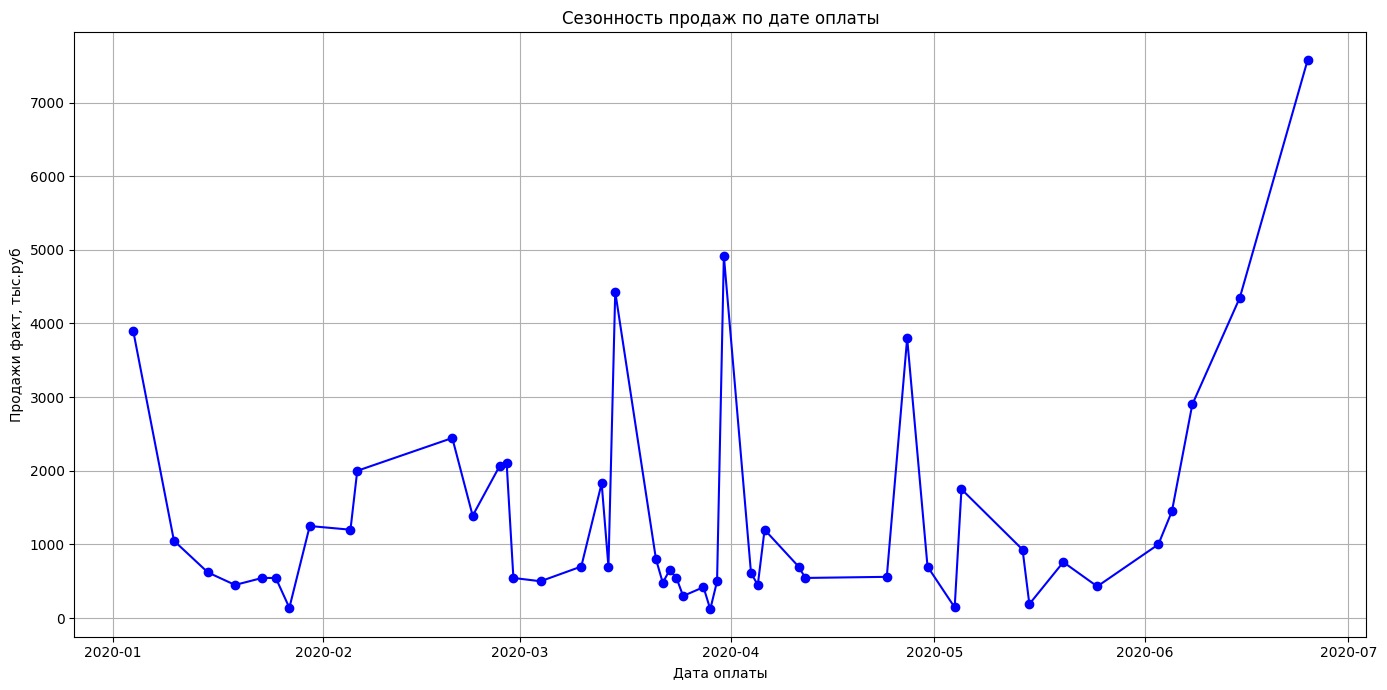

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Группировка по дате оплаты и суммирование продаж
sales_by_payment_date = data.groupby('Дата оплаты')['Продажи факт, тыс.руб'].sum()

plt.figure(figsize=(14, 7))
plt.plot(sales_by_payment_date.index, sales_by_payment_date.values, marker='o', color='blue', linestyle='-')
plt.title('Сезонность продаж по дате оплаты')
plt.xlabel('Дата оплаты')
plt.ylabel('Продажи факт, тыс.руб')
plt.grid(True)
plt.tight_layout()

plt.show()

# **ОБЩЕЕ КОЛИЧЕСТВО ПРОДАЖ**

In [ ]:
total_plan_sales = data['Продажи план, тыс.руб'].sum()
total_fact_sales = data['Продажи факт, тыс.руб'].sum()
plan_completion_rate = (total_fact_sales / total_plan_sales * 100).round(2)

print("Общая сумма плана:", total_plan_sales)
print("Общая сумма фактических продаж:", total_fact_sales)
print("Процент выполнения плана:", plan_completion_rate, '\n')

total_closed_deals = data['Завершённые сделки'].sum()
total_deals = data['Общие сделки'].sum()
deal_closure_rate = (total_closed_deals / total_deals * 100).round(2)

print("Общее количество закрытых сделок:", total_closed_deals)
print("Общее количество всех сделок:", total_deals)
print("Процент закрытия сделок:", deal_closure_rate)

Общая сумма плана: 84500
Общая сумма фактических продаж: 67211
Процент выполнения плана: 79.54 

Общее количество закрытых сделок: 93
Общее количество всех сделок: 102
Процент закрытия сделок: 91.18




---


# **ОБЩИЙ ВЫВОД**




Самые эффективные каналы продаж по всей стране - рекомендация, выставка и холодной звонок - с помощью них достигается план продаж от 80 до 106%. Они же приносят наибольшую прибыль. Только рекомендация позволила выполнить план более чем на 100%.

Абсолютным лидером среди товаров, приносящие наибольшие продажи - оборудование. Остальные товары приносят кратно меньше прибыли, но в топе также присутствуют такие родуктовые сегменты как свет, ткань и одежда.
Но по выполнению плана продаж лидируют товары, связанные с бассейном, одеждой, автозапчастями и светом - по таким товарам планы продаж выше 100%. Оборудование, приносящее наибольшую фактическую прибыль, в данный топ не попал - процент выполнения плана по продаже оборудования всего 76%.

Касаемо городов хочется заметить, что наибольшую прибыль приносят Челябинск, Казань, Магнитогорск, Сочи. Города, не приносящие прибыль - Севастополь, Ставрополь, Липецк, Ярославль - там получено 0% выручки. Однако если посмотреть на план по продажам, то присутствие товаров там минимально. И говорить об отсутствии покупательной способности у населения этих городов слишком преждевременно.
В около трети городах удалось выполнить план по продажам. В таких городах, как Кемерово, Уфа, Волгоград, Челябинск, Курск, Сочи, Тула и Казань. Как вы можете заметить, в этот список не попал Магнитогорск, который в плане продаж является полным аутсайдером - план по продажам выполнен всего на 45%.

Такой канал продаж как рекомендации позволяют выполнять план в заметном количестве городов - другие рекомендации не могут похвастаться таким успехом. Правда, рекомендация позволяет выполнять план всего лишь в половине городов - в то время как остальные рекомендации максимум в 1-2 городах.

Такой продуктовый сегмент как оборудование пользуется большим спросом в городах - достаточно обширный список городов, которые закупают его. Однако по выполнению продаж ни один продуктовый сегмент не позволил уверенно выполнить план по продажам. Если в один единственный город ввозят какие-либо товары и там выполняются планы по продаж, то это не значит, что в остальных городов будут также выполнять планы продаж по этим товарам.
Только лишь хочется заметить достаточно забавную тенденцию в Кемерово - куда выше ожиданий там раскупаются бассейны (новый конкурент Сочи?).


Если взглянуть на общие показатели у менеджеров, то вряд ли сложится какая-то однозначная картина. Хочется лишь отметить, что менеджеры Р. Хайерс и М. Баили совершают множество сделок, принося наибольшую фактическую прибыль, хотя и не с критическим недовыполнением плана и процентом закрытия сделок (т.е ниже 100%). А также, что менеджеры С. Милер и Т. Ли хуже всех себя проявили в плане выполнения плана продаж (меньше 50% в обоих случаях). Тут не придерёшься лишь к менеджеру А. Фостер, который единственный из всех, кто выполнил план больше на 100% (а план факт. продаж у него не маленький!).

Посмотрим, в каких каналах продаж преуспевают те или иные менеджеры.
Р. Хайерс неплохо (но недостаточно для плана продаж) продаёт товары с помощью выставок (81%) и вебсайтов (80%).
М. Баили сильно преуспевает в продаже товаров с помощью рекомендаций (177%).
А. Фостер очень хорошо умеет продавать товары, делая холодные звонки потенциальным покупателям (115%).
А. Перри, С. Милер, Т. Ли ни в каких каналах продаж себя удовлетворительно не проявили.

Также посмотрим, в каких продуктовых сегментах преуспевают те или иные менеджеры.
М. Баили выделяется на фоне всех остальных менеджеров - и автозапчасти (140%) продаёт, и бассейны (вот кто перевыполнил план на 300% по продаже бассейнов в Кемерово!), и одежду (155%), и сувениры (97%). Но будем честны, некоторые товары он продаёт плохо.
А. Фостер хорошо продаёт товары, связанные со светом (126%).
Р. Хайерс неплохо продаёт медицинские товары (80%) и оборудование (79%).
С. Милер и Т. Ли никакие товары хорошо не продают.

Подробный анализ данных по менеджерам показывает, что С. Милер и Т. Ли полностью профнепригодны для своей должности. Может им просто не повезло?...


Последнее, что я бы хотел сказать - о дате, когда совершились (оплачивались) сделки. Это происходило в коронавирусный 2020 год. Из-за этого сильно искажется картина о сезонности. А также картина в плане продаж (процент выполнения плана - 80%) и закрытия сделок (сделки закрыты на 90%) - сильно сказались антиковидные ограничения.
Это может объяснять взрывной рост стоимости всех сделок с начала июня, когда стали снимать самые жёсткие антиковидные ограничения. Но само количество сделок достаточно равномерно распределено по месяцам - каких-то больших и ярких провалов нет. Самое меньше их количество - в апреле и мае - во время жёстких антиковидных ограничений.
Хочется также отметить неполноту данных в плане дат, когда совершались сделки - данные представлены только за 7 месяцев. Хотелось бы видеть картинку за весь год.